In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import sys
sys.path.append("../../simpsom")
import simpsom as sps

import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
labels = digits.target
data = np.array(df)

In [4]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, debug=True)
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='euclidean', random_seed=42, GPU=False, debug=True)
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=True, init='PCA', metric='manhattan', random_seed=42, GPU=False, debug=True)
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

2022-06-09 22:31:51.894 | INFO     | simpsom.network:__init__:112 - Hexagonal topology.
2022-06-09 22:31:51.895 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:51.900 | INFO     | simpsom.network:train:357 - The map will be trained with the online algorithm.
2022-06-09 22:31:51.901 | WARNING  | simpsom.network:_randomize_dataset:255 - Epochs for online training are less than the entry datapoints.
Training SOM... 0%1.903 | DEBUG    | simpsom.network:train:385 - 
/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:131: RuntimeWarning: invalid value encountered in true_divide
  (b/xp.linalg.norm(b,axis=1)[:,None]).T)
2022-06-09 22:31:51.931 | INFO     | simpsom.network:__init__:112 - Hexagonal topology.
2022-06-09 22:31:51.932 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:51.938 | INFO     | simpsom.network:train:357 - The map will be trained with the online alg

In [5]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, debug=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='euclidean', random_seed=42, GPU=False, debug=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=True, init='PCA', metric='manhattan', random_seed=42, GPU=False, debug=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

2022-06-09 22:31:52.095 | INFO     | simpsom.network:__init__:112 - Hexagonal topology.
2022-06-09 22:31:52.097 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:52.102 | INFO     | simpsom.network:train:357 - The map will be trained with the batch algorithm.
Training SOM... 0%2.104 | DEBUG    | simpsom.network:train:451 - 
/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:56: RuntimeWarning: invalid value encountered in true_divide
  similarity = xp.nan_to_num(num/denum)
2022-06-09 22:31:52.209 | INFO     | simpsom.network:__init__:112 - Hexagonal topology.
2022-06-09 22:31:52.211 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:52.216 | INFO     | simpsom.network:train:357 - The map will be trained with the batch algorithm.
Training SOM... 0%2.218 | DEBUG    | simpsom.network:train:451 - 
2022-06-09 22:31:52.321 | INFO     | simpsom.network:__init__:103 - Peri

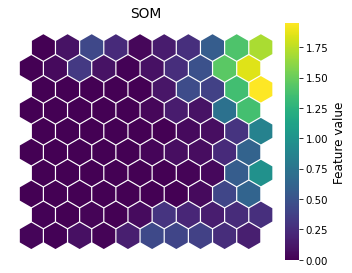

In [6]:
net.plot_map_by_feature(feature=1, show=True, print_out=False)

2022-06-09 22:31:53.927 | INFO     | simpsom.network:get_nodes_difference:543 - Weights difference among neighboring nodes calculated.


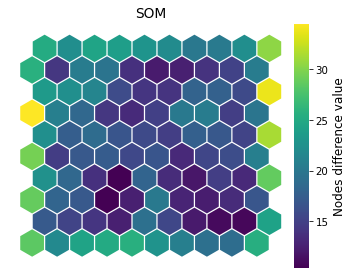

In [7]:
_ = net.plot_map_by_difference(show=True, print_out=False, returns=False)

2022-06-09 22:31:54.135 | INFO     | simpsom.network:project_onto_map:570 - Projected coordinates will be saved to:
././som_projected.npy


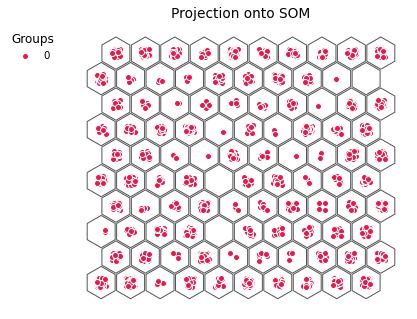

2022-06-09 22:31:54.313 | INFO     | simpsom.network:project_onto_map:570 - Projected coordinates will be saved to:
././som_projected.npy


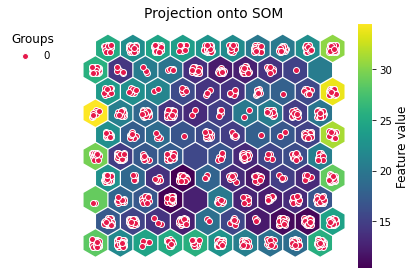

In [8]:
_ = net.plot_projected_points(net.project_onto_map(data), 
                             project=False, jitter=True, 
                             show=True, print_out=False)
_ = net.plot_projected_points(data, color_val=[n.difference for n in net.node_list],
                             project=True, jitter=True, 
                             show=True, print_out=False)

2022-06-09 22:31:54.542 | INFO     | simpsom.network:project_onto_map:570 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-09 22:31:54.611 | INFO     | simpsom.network:cluster:634 - Clustering results will be saved to:
././som_clusters.npy
2022-06-09 22:31:54.660 | INFO     | simpsom.network:project_onto_map:570 - Projected coordinates will be saved to:
././som_projected.npy


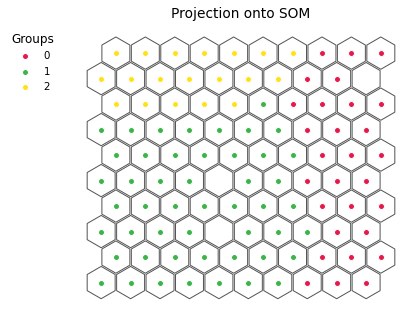

2022-06-09 22:31:55.288 | INFO     | simpsom.network:plot_clusters:835 - Clustering plot will be saved to:
././som_clustering.png


In [9]:
labs, points = net.cluster(data, clu_algo='AgglomerativeClustering')
net.plot_clusters(data, labs, project=True, show=True)

In [10]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=41, GPU=False, debug=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1, early_stop='mapdiff')

2022-06-09 22:31:55.300 | INFO     | simpsom.network:__init__:112 - Hexagonal topology.
2022-06-09 22:31:55.302 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:55.310 | INFO     | simpsom.network:train:357 - The map will be trained with the batch algorithm.
Training SOM... 0%5.312 | DEBUG    | simpsom.network:train:451 - 
/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:56: RuntimeWarning: invalid value encountered in true_divide
  similarity = xp.nan_to_num(num/denum)
/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:131: RuntimeWarning: invalid value encountered in true_divide
  (b/xp.linalg.norm(b,axis=1)[:,None]).T)
Early stop tolerance reached at epoch 4, stopping training.444 - 


2022-06-09 22:31:55.752 | INFO     | simpsom.network:plot_convergence:746 - Convergence results will be saved to:
././som_convergence.png


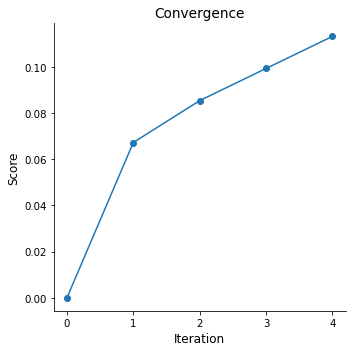

In [11]:
net.plot_convergence(fsize=(5, 5), logax=False)

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
labels = digits.target
data = np.array(df)

In [13]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, debug=True, topology="rectangular")
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='euclidean', random_seed=42, GPU=False, debug=True, topology="rectangular")
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=True, init='PCA', metric='manhattan', random_seed=42, GPU=False, debug=True, topology="rectangular")
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

2022-06-09 22:31:55.960 | INFO     | simpsom.network:__init__:115 - Square topology.
2022-06-09 22:31:55.961 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:55.966 | INFO     | simpsom.network:train:357 - The map will be trained with the online algorithm.
2022-06-09 22:31:55.967 | WARNING  | simpsom.network:_randomize_dataset:255 - Epochs for online training are less than the entry datapoints.
Training SOM... 0%5.969 | DEBUG    | simpsom.network:train:385 - 
/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:131: RuntimeWarning: invalid value encountered in true_divide
  (b/xp.linalg.norm(b,axis=1)[:,None]).T)
2022-06-09 22:31:55.992 | INFO     | simpsom.network:__init__:115 - Square topology.
2022-06-09 22:31:55.993 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:55.998 | INFO     | simpsom.network:train:357 - The map will be trained with the online algorithm

In [14]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, debug=True, topology="rectangular")
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='euclidean', random_seed=42, GPU=False, debug=True, topology="rectangular")
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=True, init='PCA', metric='manhattan', random_seed=42, GPU=False, debug=True, topology="rectangular")
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

2022-06-09 22:31:56.151 | INFO     | simpsom.network:__init__:115 - Square topology.
2022-06-09 22:31:56.153 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:56.158 | INFO     | simpsom.network:train:357 - The map will be trained with the batch algorithm.
Training SOM... 0%6.160 | DEBUG    | simpsom.network:train:451 - 
/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:56: RuntimeWarning: invalid value encountered in true_divide
  similarity = xp.nan_to_num(num/denum)
2022-06-09 22:31:56.257 | INFO     | simpsom.network:__init__:115 - Square topology.
2022-06-09 22:31:56.259 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:56.264 | INFO     | simpsom.network:train:357 - The map will be trained with the batch algorithm.
Training SOM... 0%6.266 | DEBUG    | simpsom.network:train:451 - 
2022-06-09 22:31:56.366 | INFO     | simpsom.network:__init__:103 - Periodic B

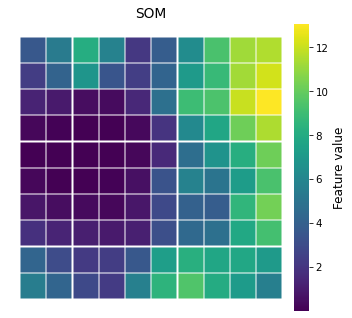

In [15]:
net.plot_map_by_feature(feature=2, show=True, print_out=False)

2022-06-09 22:31:57.880 | INFO     | simpsom.network:get_nodes_difference:543 - Weights difference among neighboring nodes calculated.


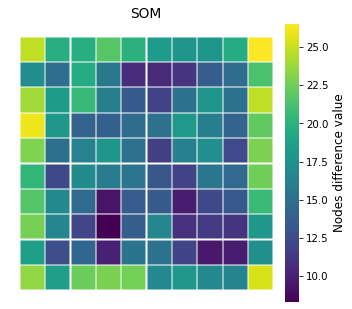

In [16]:
_ = net.plot_map_by_difference(show=True, print_out=False, returns=False)

2022-06-09 22:31:58.075 | INFO     | simpsom.network:project_onto_map:570 - Projected coordinates will be saved to:
././som_projected.npy


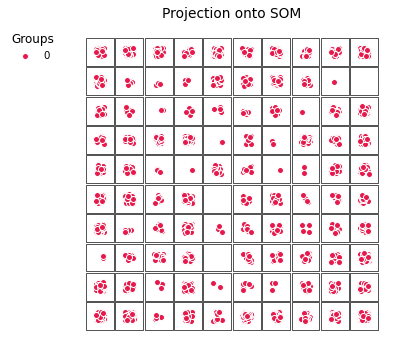

2022-06-09 22:31:58.237 | INFO     | simpsom.network:project_onto_map:570 - Projected coordinates will be saved to:
././som_projected.npy


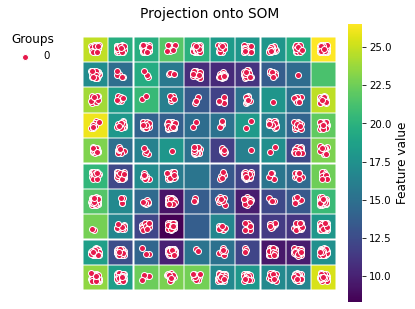

In [17]:
_ = net.plot_projected_points(net.project_onto_map(data), 
                             project=False, jitter=True, 
                             show=True, print_out=False)
_ = net.plot_projected_points(data, color_val=[n.difference for n in net.node_list],
                             project=True, jitter=True, 
                             show=True, print_out=False)

2022-06-09 22:31:58.470 | INFO     | simpsom.network:project_onto_map:570 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-09 22:31:58.533 | INFO     | simpsom.network:cluster:634 - Clustering results will be saved to:
././som_clusters.npy
2022-06-09 22:31:58.582 | INFO     | simpsom.network:project_onto_map:570 - Projected coordinates will be saved to:
././som_projected.npy


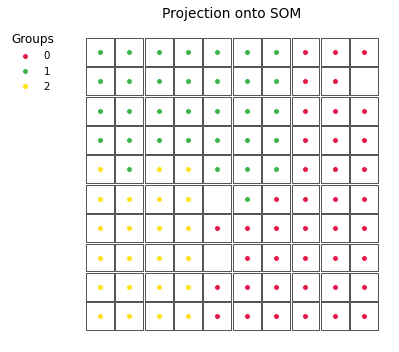

2022-06-09 22:31:59.097 | INFO     | simpsom.network:plot_clusters:835 - Clustering plot will be saved to:
././som_clustering.png


In [18]:
labs, points = net.cluster(data, clu_algo='AgglomerativeClustering')
net.plot_clusters(data, labs, project=True, show=True)

In [19]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, debug=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1, early_stop='mapdiff')

2022-06-09 22:31:59.107 | INFO     | simpsom.network:__init__:112 - Hexagonal topology.
2022-06-09 22:31:59.110 | INFO     | simpsom.network:_set_weights:148 - The weights will be initialized with PCA.
2022-06-09 22:31:59.116 | INFO     | simpsom.network:train:357 - The map will be trained with the batch algorithm.
Training SOM... 0%9.118 | DEBUG    | simpsom.network:train:451 - 
/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:56: RuntimeWarning: invalid value encountered in true_divide
  similarity = xp.nan_to_num(num/denum)
/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:131: RuntimeWarning: invalid value encountered in true_divide
  (b/xp.linalg.norm(b,axis=1)[:,None]).T)
Early stop tolerance reached at epoch 4, stopping training.444 - 


2022-06-09 22:31:59.557 | INFO     | simpsom.network:plot_convergence:746 - Convergence results will be saved to:
././som_convergence.png


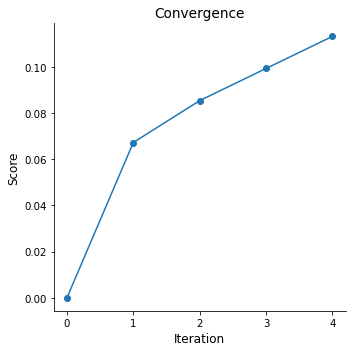

In [20]:
net.plot_convergence(fsize=(5, 5), logax=False)